# Python API Homework - What's the Weather Like?

## Background

Whether financial, political, or social -- data's true power lies in its
ability to answer questions definitively. So let's take what you've learned 
about Python requests, APIs, and JSON traversals to answer a fundamental
question: "What's the weather like as we approach the equator?"

Now, we know what you may be thinking: _"Duh. It gets hotter..."_

But, if pressed, how would you **prove** it?

![Equator](Images/equatorsign.png)

### Before You Begin

1. Create a new repository for this project called `python-api-challenge`. 
   **Do not add this homework to an existing repository**.

2. Clone the new repository to your computer.

3. Inside your local git repository, create a directory for both of the
   Python Challenges. Use folder names corresponding to the challenges: **WeatherPy**.

        
4. Inside the folder that you just created, add new files called `WeatherPy.ipynb` 
   and `VacationPy.ipynb`. These will be the main scripts to run for each
   analysis.

5. Push the above changes to GitHub.

*******************************************************


## Part I - WeatherPy

In this example, you'll be creating a Python script to visualize the weather of 
500+ cities across the world of varying distance from the equator. 
To accomplish this, you'll be utilizing a [simple Python library]
(https://pypi.python.org/pypi/citipy), 
the [OpenWeatherMap API](https://openweathermap.org/api), and a little 
common sense to create a representative model of weather across world cities.

Your first requirement is to create a series of scatter plots to showcase 
the following relationships:

* Temperature (F) vs. Latitude
* Humidity (%) vs. Latitude
* Cloudiness (%) vs. Latitude
* Wind Speed (mph) vs. Latitude

After each plot add a sentence or too explaining what the code is and 
analyzing.

Your second requirement is to run linear regression on each relationship, 
only this time separating them into Northern Hemisphere (greater than 
or equal to 0 degrees latitude) and Southern Hemisphere (less than 0 
degrees latitude):

* Northern Hemisphere - Temperature (F) vs. Latitude
* Southern Hemisphere - Temperature (F) vs. Latitude
* Northern Hemisphere - Humidity (%) vs. Latitude
* Southern Hemisphere - Humidity (%) vs. Latitude
* Northern Hemisphere - Cloudiness (%) vs. Latitude
* Southern Hemisphere - Cloudiness (%) vs. Latitude
* Northern Hemisphere - Wind Speed (mph) vs. Latitude
* Southern Hemisphere - Wind Speed (mph) vs. Latitude

After each pair of plots explain what the linear regression is modeling 
such as any relationships you notice and any other analysis you may have.

**Optional** You will be creating multiple linear regression plots. 
To optimize your code, write a function that creates the linear regression plots.

Your final notebook must:

* Randomly select **at least** 500 unique (non-repeat) cities based on 
  latitude and longitude.
* Perform a weather check on each of the cities using a series of successive 
  API calls.
* Include a print log of each city as it's being processed with the city 
  number and city name.
* Save a CSV of all retrieved data and a PNG image for each scatter plot.



# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import urllib
import json
import seaborn as sns
from citipy import citipy
import random
from pprint import pprint
import csv

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

620

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# OpenWeatherMap API Key
api_key = weather_api_key = "0fa2d78562d743fb83f04b84910036ae"

# Starting URL for Weather Map API Call
url = 'http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=' + api_key

url

'http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0fa2d78562d743fb83f04b84910036ae'

In [4]:
# I was having some trouble with the appropriate way to perform the api calls so I have two versions thus far!!!!
# Making an empty list to which we will append information obtained from these api calls and the
# output and enter them into lists and then into a DataFrame for further analyses and visualization

city_data = []

# using data provided to us in the starter code, which took some time for me to figure out what to do with

print("Beginning Data Retrieval     ")
print("-----------------------------")

# variables to iterate and use to count items
record_count = 1
set_count = 1

# Iterate over all the cities in our list, [cities], made in the 2nd cell
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for print log, or logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create an endpoint URL with each city
    city_url = url + "&q=" + urllib.request.pathname2url(city)

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))
    print(city_url)

    # Add 1 to the record count for each single additional iteration
    record_count += 1

    # perform an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out the max temp, humidity, and cloudiness
        city_latitute = city_weather["coord"]["lat"]
        city_longitude = city_weather["coord"]["lon"]
        city_max_temperature = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_latitute, 
                          "Lng": city_longitude, 
                          "Max Temp": city_max_temperature,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | handan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0fa2d78562d743fb83f04b84910036ae&q=handan
Processing Record 2 of Set 1 | ribeira grande
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0fa2d78562d743fb83f04b84910036ae&q=ribeira%20grande
Processing Record 3 of Set 1 | grand-santi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0fa2d78562d743fb83f04b84910036ae&q=grand-santi
Processing Record 4 of Set 1 | qaanaaq
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0fa2d78562d743fb83f04b84910036ae&q=qaanaaq
Processing Record 5 of Set 1 | tasiilaq
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0fa2d78562d743fb83f04b84910036ae&q=tasiilaq
Processing Record 6 of Set 1 | bluff
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0fa2d78562d743fb83f04b84910036ae&q=bluff
Processing Record 7 

Processing Record 5 of Set 2 | salalah
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0fa2d78562d743fb83f04b84910036ae&q=salalah
Processing Record 6 of Set 2 | atuona
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0fa2d78562d743fb83f04b84910036ae&q=atuona
Processing Record 7 of Set 2 | udachnyy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0fa2d78562d743fb83f04b84910036ae&q=udachnyy
Processing Record 8 of Set 2 | sitka
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0fa2d78562d743fb83f04b84910036ae&q=sitka
Processing Record 9 of Set 2 | flinders
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0fa2d78562d743fb83f04b84910036ae&q=flinders
Processing Record 10 of Set 2 | vaini
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0fa2d78562d743fb83f04b84910036ae&q=vaini
Processing Record 11 of Set 2 | caravelas
http://api.openweathermap.org/data/2.5/weather?units=Imperial&A

Processing Record 8 of Set 3 | lolua
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0fa2d78562d743fb83f04b84910036ae&q=lolua
City not found...
Processing Record 9 of Set 3 | shubarshi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0fa2d78562d743fb83f04b84910036ae&q=shubarshi
Processing Record 10 of Set 3 | arraial do cabo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0fa2d78562d743fb83f04b84910036ae&q=arraial%20do%20cabo
Processing Record 11 of Set 3 | carnarvon
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0fa2d78562d743fb83f04b84910036ae&q=carnarvon
Processing Record 12 of Set 3 | biskamzha
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0fa2d78562d743fb83f04b84910036ae&q=biskamzha
Processing Record 13 of Set 3 | raahe
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0fa2d78562d743fb83f04b84910036ae&q=raahe
Processing Record 14 of Set 3 | lebu
http://api.openwe

Processing Record 14 of Set 4 | leningradskiy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0fa2d78562d743fb83f04b84910036ae&q=leningradskiy
Processing Record 15 of Set 4 | new norfolk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0fa2d78562d743fb83f04b84910036ae&q=new%20norfolk
Processing Record 16 of Set 4 | chagda
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0fa2d78562d743fb83f04b84910036ae&q=chagda
City not found...
Processing Record 17 of Set 4 | gopalur
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0fa2d78562d743fb83f04b84910036ae&q=gopalur
Processing Record 18 of Set 4 | mayo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0fa2d78562d743fb83f04b84910036ae&q=mayo
Processing Record 19 of Set 4 | khatanga
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0fa2d78562d743fb83f04b84910036ae&q=khatanga
Processing Record 20 of Set 4 | rafai
http://api.openweather

Processing Record 17 of Set 5 | menongue
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0fa2d78562d743fb83f04b84910036ae&q=menongue
Processing Record 18 of Set 5 | sao domingos
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0fa2d78562d743fb83f04b84910036ae&q=sao%20domingos
Processing Record 19 of Set 5 | volksrust
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0fa2d78562d743fb83f04b84910036ae&q=volksrust
Processing Record 20 of Set 5 | saskylakh
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0fa2d78562d743fb83f04b84910036ae&q=saskylakh
Processing Record 21 of Set 5 | vila franca do campo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0fa2d78562d743fb83f04b84910036ae&q=vila%20franca%20do%20campo
Processing Record 22 of Set 5 | longyearbyen
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0fa2d78562d743fb83f04b84910036ae&q=longyearbyen
Processing Record 23 of Set 5 

Processing Record 22 of Set 6 | namatanai
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0fa2d78562d743fb83f04b84910036ae&q=namatanai
Processing Record 23 of Set 6 | santiago del estero
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0fa2d78562d743fb83f04b84910036ae&q=santiago%20del%20estero
Processing Record 24 of Set 6 | sobolevo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0fa2d78562d743fb83f04b84910036ae&q=sobolevo
Processing Record 25 of Set 6 | shambu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0fa2d78562d743fb83f04b84910036ae&q=shambu
Processing Record 26 of Set 6 | cayenne
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0fa2d78562d743fb83f04b84910036ae&q=cayenne
Processing Record 27 of Set 6 | lumsden
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0fa2d78562d743fb83f04b84910036ae&q=lumsden
Processing Record 28 of Set 6 | amderma
http://api.openweather

Processing Record 28 of Set 7 | berlevag
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0fa2d78562d743fb83f04b84910036ae&q=berlevag
Processing Record 29 of Set 7 | amarpur
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0fa2d78562d743fb83f04b84910036ae&q=amarpur
Processing Record 30 of Set 7 | chardara
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0fa2d78562d743fb83f04b84910036ae&q=chardara
Processing Record 31 of Set 7 | lethem
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0fa2d78562d743fb83f04b84910036ae&q=lethem
Processing Record 32 of Set 7 | kushmurun
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0fa2d78562d743fb83f04b84910036ae&q=kushmurun
Processing Record 33 of Set 7 | kamenka
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0fa2d78562d743fb83f04b84910036ae&q=kamenka
Processing Record 34 of Set 7 | yurginskoye
http://api.openweathermap.org/data/2.5/weath

Processing Record 34 of Set 8 | los llanos de aridane
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0fa2d78562d743fb83f04b84910036ae&q=los%20llanos%20de%20aridane
Processing Record 35 of Set 8 | ingham
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0fa2d78562d743fb83f04b84910036ae&q=ingham
Processing Record 36 of Set 8 | constantine
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0fa2d78562d743fb83f04b84910036ae&q=constantine
Processing Record 37 of Set 8 | estacion coahuila
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0fa2d78562d743fb83f04b84910036ae&q=estacion%20coahuila
Processing Record 38 of Set 8 | ndele
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0fa2d78562d743fb83f04b84910036ae&q=ndele
Processing Record 39 of Set 8 | myslowice
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0fa2d78562d743fb83f04b84910036ae&q=myslowice
Processing Record 40 of Set 8 | 

Processing Record 39 of Set 9 | rongcheng
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0fa2d78562d743fb83f04b84910036ae&q=rongcheng
Processing Record 40 of Set 9 | sakaiminato
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0fa2d78562d743fb83f04b84910036ae&q=sakaiminato
Processing Record 41 of Set 9 | zyryanka
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0fa2d78562d743fb83f04b84910036ae&q=zyryanka
Processing Record 42 of Set 9 | freeport
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0fa2d78562d743fb83f04b84910036ae&q=freeport
Processing Record 43 of Set 9 | inhambane
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0fa2d78562d743fb83f04b84910036ae&q=inhambane
Processing Record 44 of Set 9 | mys shmidta
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0fa2d78562d743fb83f04b84910036ae&q=mys%20shmidta
City not found...
Processing Record 45 of Set 9 | konin
http://a

Processing Record 43 of Set 10 | yialos
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0fa2d78562d743fb83f04b84910036ae&q=yialos
City not found...
Processing Record 44 of Set 10 | lubango
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0fa2d78562d743fb83f04b84910036ae&q=lubango
Processing Record 45 of Set 10 | begun
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0fa2d78562d743fb83f04b84910036ae&q=begun
Processing Record 46 of Set 10 | matay
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0fa2d78562d743fb83f04b84910036ae&q=matay
Processing Record 47 of Set 10 | xichang
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0fa2d78562d743fb83f04b84910036ae&q=xichang
Processing Record 48 of Set 10 | jardim
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0fa2d78562d743fb83f04b84910036ae&q=jardim
Processing Record 49 of Set 10 | dunedin
http://api.openweathermap.org/data/2.5/we

Processing Record 48 of Set 11 | nuevo progreso
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0fa2d78562d743fb83f04b84910036ae&q=nuevo%20progreso
Processing Record 49 of Set 11 | bakchar
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0fa2d78562d743fb83f04b84910036ae&q=bakchar
Processing Record 0 of Set 12 | joshimath
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0fa2d78562d743fb83f04b84910036ae&q=joshimath
Processing Record 1 of Set 12 | taoudenni
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0fa2d78562d743fb83f04b84910036ae&q=taoudenni
Processing Record 2 of Set 12 | wilmington
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0fa2d78562d743fb83f04b84910036ae&q=wilmington
Processing Record 3 of Set 12 | yumen
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0fa2d78562d743fb83f04b84910036ae&q=yumen
Processing Record 4 of Set 12 | amuntai
http://api.openweathermap.

Processing Record 2 of Set 13 | fukue
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0fa2d78562d743fb83f04b84910036ae&q=fukue
Processing Record 3 of Set 13 | ukiah
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0fa2d78562d743fb83f04b84910036ae&q=ukiah
Processing Record 4 of Set 13 | neryungri
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0fa2d78562d743fb83f04b84910036ae&q=neryungri
Processing Record 5 of Set 13 | vikhorevka
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0fa2d78562d743fb83f04b84910036ae&q=vikhorevka
Processing Record 6 of Set 13 | san pedro
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0fa2d78562d743fb83f04b84910036ae&q=san%20pedro
Processing Record 7 of Set 13 | botou
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0fa2d78562d743fb83f04b84910036ae&q=botou
Processing Record 8 of Set 13 | kjollefjord
http://api.openweathermap.org/data/2.5/weather

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
# Convert array of JSONs into Pandas DataFrame
city_data_pd = pd.DataFrame(city_data)




# Show Record Count
city_data_pd.count()

City          567
Lat           567
Lng           567
Max Temp      567
Humidity      567
Cloudiness    567
Wind Speed    567
Country       567
Date          567
dtype: int64

In [6]:
# DataFrame below to display-using different method to create a df than usual
city_data_pd

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,handan,36.60,114.47,76.23,74,59,7.65,CN,1595351038
1,ribeira grande,38.52,-28.70,75.20,53,40,6.93,PT,1595351038
2,grand-santi,4.25,-54.38,91.13,48,53,5.35,GF,1595351038
3,qaanaaq,77.48,-69.36,49.10,52,21,1.45,GL,1595351039
4,tasiilaq,65.61,-37.64,46.40,70,40,10.29,GL,1595350750
...,...,...,...,...,...,...,...,...,...
562,ulaanbaatar,47.91,106.88,59.00,58,20,2.24,MN,1595350799
563,springbok,-29.66,17.89,55.58,39,0,1.70,ZA,1595351086
564,kargasok,59.06,80.86,58.80,76,55,10.96,RU,1595351086
565,miri,4.41,114.01,80.60,94,40,4.03,MY,1595351086


In [21]:
# Export the City_Data into a csv
city_data_pd.to_csv("WeatherPy.csv",encoding="utf-8",index=False)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [22]:
# First filter out those rows which the rows don't contain any data

city_data_pd_dropna = city_data_pd.dropna(how = 'all') 
city_data_pd_dropna  


""


In [9]:
#  Get the indices of cities that have humidity over 100%.
# Filter all rows for which the cities' humidities are = 100%
city_data_pd_filtered = city_data_pd[city_data_pd['Humidity'] == 100] 
  
# Print the new dataframe 
city_data_pd_filtered 
  


  


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
6,petropavlovsk-kamchatskiy,53.05,158.65,48.20,100,20,6.71,RU,1595351039
11,ushuaia,-54.80,-68.30,33.80,100,52,3.36,AR,1595351039
57,vaini,-21.20,-175.20,57.20,100,20,2.53,TO,1595351043
103,carnarvon,-24.87,113.63,62.60,100,0,9.17,AU,1595351046
111,fortuna,40.60,-124.16,57.99,100,90,3.36,US,1595350746
121,mutsu,41.29,141.22,71.01,100,90,4.70,JP,1595351047
185,georgetown,5.41,100.34,78.80,100,20,3.36,MY,1595351052
203,mount gambier,-37.83,140.77,46.40,100,90,5.82,AU,1595351053
223,north bend,43.41,-124.22,60.01,100,90,9.24,US,1595350875
246,shambu,9.57,37.10,52.07,100,100,2.53,ET,1595351057


In [23]:
# Print the shape of the dataframe 
city_data_pd_filtered.shape

NameError: name 'city_data_pd_filtered' is not defined

In [24]:
# Filter all rows for which city's have a humidity equal to 100%
city_data_pd.drop(city_data_pd[city_data_pd["Humidity] == 100].index, inplace = False) 
  
city_data_pd
  


 

KeyError: 'Humidity'

In [17]:
city_data_pd.shape


(0, 0)

In [18]:
# We went from 567,9 to 550,9-->so 17 cities had humidities = 100%

city_data_pd.shape

(0, 0)

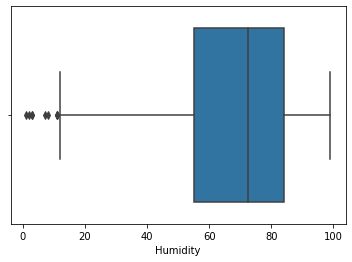

In [13]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

import seaborn as sns
sns.boxplot(x = city_data_pd['Humidity'])

In [ ]:
# Extract relevant fields from the data frame


# Export the City_Data into a csv


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

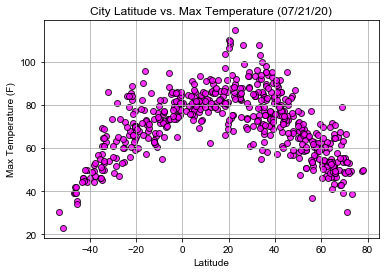

In [14]:
# Build scatter plot for latitude vs temperature
plt.scatter(city_data_pd["Lat"], 
            city_data_pd["Max Temp"],
            edgecolor="black", linewidths=1, marker="o",c = "magenta", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)
sns.set()

# Save the figure
plt.savefig("Latitude vs Temperature (F).png")

# Show plot
plt.show()

## Latitude vs. Humidity Plot

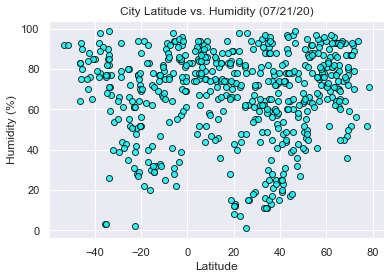

In [15]:
# Build the scatter plots for each city types
plt.scatter(city_data_pd["Lat"], 
            city_data_pd["Humidity"],
            edgecolor="black", linewidths=1, marker="o",c = "cyan", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
sns.set()

# Save the figure
plt.savefig("Latitude vs Humidity (%).png")

# Show plot
plt.show()

## Latitude vs. Cloudiness Plot

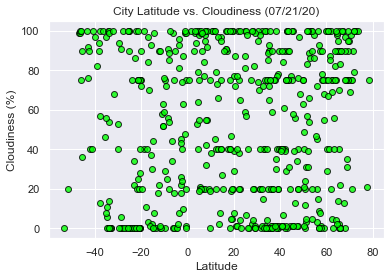

In [16]:
# Build the scatter plots for each city types
plt.scatter(city_data_pd["Lat"], 
            city_data_pd["Cloudiness"],
            edgecolor="black", linewidths=1, marker="o", c = "lime",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
sns.set()

# Save the figure
plt.savefig("Latitude vs Cloudiness (%).png")

# Show plot
plt.show()

## Latitude vs. Wind Speed Plot

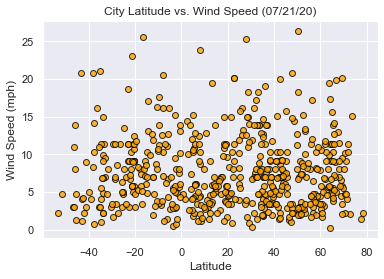

In [23]:
# Build the scatter plots for each city types
plt.scatter(city_data_pd["Lat"], 
            city_data_pd["Wind Speed"],
            edgecolor="black", linewidths=1, marker="o", c = "orange",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
sns.set()

# Save the figure
plt.savefig("Latitude vs Wind Speed (MPH).png")

# Show plot
plt.show()

## Linear Regression

In [ ]:
# OPTIONAL: Create a function to create Linear Regression plots

In [ ]:
# Create Northern and Southern Hemisphere DataFrames
In [1047]: df1, df2 = [x for _, x in df.groupby(df['Sales'] < 30)]


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression